# Центральная предельная теорема своими руками (Распределение Стьюдента)
### Импортируем требуемые библиотеки

In [2]:
from IPython.display import Latex
import numpy as np
import scipy as sp
from scipy.stats import t
from scipy.stats import norm
import matplotlib.pyplot as plt

%matplotlib inline

### Напишем формулу для распределения Стюдента

Ссылка на статью распределения:
https://en.wikipedia.org/wiki/Student%27s_t-distribution

Пусть $Y_0,Y_1,\ldots, Y_n$ — независимые стандартные нормальные случайные величины, такие что $Y_i \sim \mathrm{N}(0,1),\; i=1,\ldots, n.$ Тогда распределение случайной величины $t$, где

$t = \frac{Y_0}{\sqrt{\frac{1}{n}\sum\limits_{i=1}^n Y_i^2}}$

$\mu = 0$, если $n > 1$

$\sigma^2 = \frac{n}{n-2}$  если $n > 2$

---
Для меня t-распределение или распределение Стьюдента привлекательно тем, что позволяет оценивать вероятность события на маленьких выборках. 

### Построим график функции распределения 

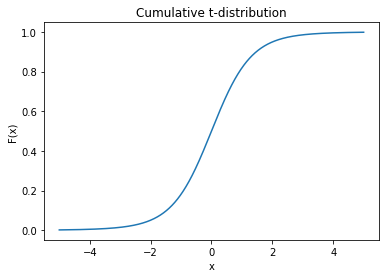

In [4]:
mu = 0 # математическое ожидание
df = 5. # количество степеней свободы 

X = np.linspace(-5., 5., 1000)
cdf = t.cdf(X, df)

plt.plot(X, cdf)

plt.ylabel('F(x)')
plt.xlabel('x')
plt.title('Cumulative t-distribution')
plt.show()

### Построим график плотности вероятности 

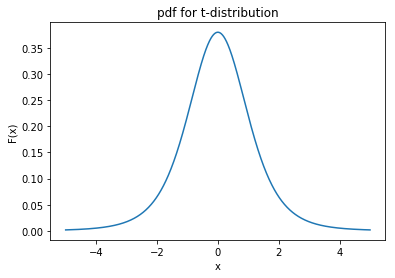

In [5]:
pdf = t.pdf(X, df) 

plt.plot(X, pdf)

plt.ylabel('F(x)')
plt.xlabel('x')
plt.title('pdf for t-distribution')
plt.show()

### Сделаем генератор распределения и наложим теоретическое респределение

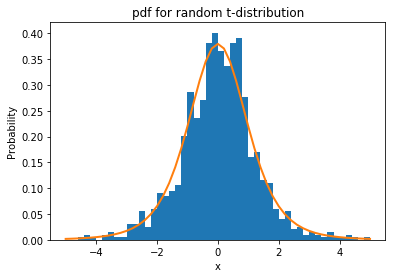

In [8]:
# cделаем генератор для t-распределения
rv_student = t(df) 
student = rv_student.rvs(size=1000, random_state=None)

bins = np.linspace(-5., 5., 51) #сделаем более удобные корзины для гистограммы, обрезав края на ней

# нарисуем требуемые графики
plt.hist(student, bins, normed=True)
plt.plot(bins, t.pdf(bins, df), lw=2)
plt.ylabel('Probability')
plt.xlabel('x')
plt.title('pdf for random t-distribution')

plt.show()

### Распределение выборочных средних для объема 5, 10 и 50

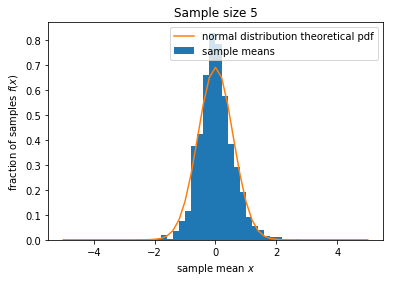

mean = 0 
sigma = 0.57735026919
degrees of freedom = 5.0


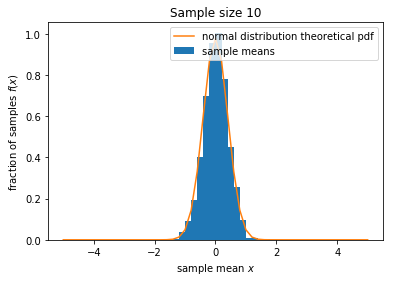

mean = 0 
sigma = 0.408248290464
degrees of freedom = 5.0


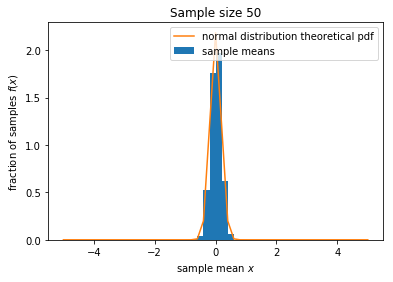

mean = 0 
sigma = 0.182574185835
degrees of freedom = 5.0


In [10]:
#создадим цикл для разных размеров выборки
for n in [5, 10, 50]:
    
    # создадим массив и цикл для записи средних значений случайного t-распределения
    values = []
    for num in range(1000):
        values.append(rv_student.rvs(size=n, random_state=None).mean())
        
        
    # расчитаем стандартное отклонение согласно формуле и зададим нормальное распределение
    sigma = np.sqrt(df/(df-2.)/n)
    norm_rv = norm(mu, np.sqrt(df/(df-2.)/n))
    pdf = norm_rv.pdf(bins)
        
    # нарисуем требуемые гистограмму и график
    plt.hist(values, bins, normed=True, label='sample means')
    plt.plot(bins, pdf, label='normal distribution theoretical pdf')
    plt.legend()
    plt.title("Sample size %d" % n)
    plt.ylabel('fraction of samples $f(x)$')
    plt.xlabel('sample mean $x$')
    plt.show()    
    
    # напечатаем параметры
    print('mean = 0 \nsigma = '+ str(sigma) + '\ndegrees of freedom = ' + str(df))

### Вывод

При увеличении размера выборки, насколько видно по значениям sigma, распределение средних значений начинает сходиться к 0. Мы видим хорошую аппроксимацию t-распределения к нормальному, что подтверждает выводы центральной лимитной теоремы и закона больших чисел.